<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



In [1]:
!pip install sqlalchemy==1.3.9


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 114.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... one
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp312-cp312-linux_x86_64.whl size=1160111 sha256=33302e5a0474515f82906553095d3a9480c51996a0d85a6139fb2845f1ec59ab
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/b3/1c/42/0e26b8d512adc6bce10ff71a05229366b4ccec641cd3b42111
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.37
    Uninstalling SQLAlchemy-2.0.37:
      Successfully uninstalled SQLAlchemy-2.0.37
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterhub 5.2.1 requires SQLAlchemy>=1.4.1, but you have sqlalchemy 1.3.9 which is incompatible.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [2]:
!pip install ipython-sql
!pip install ipython-sql prettytable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [3]:
%load_ext sql

In [4]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [5]:
!pip install -q pandas

In [6]:
%sql sqlite:///my_data1.db

In [7]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

**Note:This below code is added to remove blank rows from table**


In [8]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [9]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [14]:
df.columns

Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome'],
      dtype='object')

In [12]:
query = 'SELECT DISTINCT "Launch_Site" FROM SPACEXTABLE'
cur.execute(query)

# Fetch and print results
rows = cur.fetchall()
for row in rows:
    print(row[0])

CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


In [16]:
query = '''
SELECT * 
FROM SPACEXTABLE 
WHERE "Launch_Site" LIKE 'CCA%' 
LIMIT 5
'''
cur.execute(query)
rows = cur.fetchall()

df_results = pd.read_sql_query(query, con)
df_results

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [17]:
query = '''
SELECT SUM("PAYLOAD_MASS__KG_") AS total_payload_mass
FROM SPACEXTABLE
WHERE "Customer" = 'NASA (CRS)'
'''

#load the result into a df
df_nasa_payload = pd.read_sql_query(query, con)
df_nasa_payload


,total_payload_mass
0,45596


### Task 4




##### Display average payload mass carried by booster version F9 v1.1


In [19]:
query = '''
SELECT AVG("PAYLOAD_MASS__KG_") AS average_payload_mass
FROM SPACEXTABLE
WHERE "Booster_Version" = 'F9 v1.1'
'''

df_avg_payload = pd.read_sql_query(query, con)
df_avg_payload

,average_payload_mass
0,2928.4


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [20]:
query = '''
SELECT MIN("Date") AS first_successful_ground_pad_landing
FROM SPACEXTABLE
WHERE "Landing_Outcome" = 'Success (ground pad)'
'''

# Run the query and load into a DataFrame
df_first_landing = pd.read_sql_query(query, con)

# Display result
df_first_landing


,first_successful_ground_pad_landing
0,2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [21]:
query = '''
SELECT "Booster_Version"
FROM SPACEXTABLE
WHERE "Landing_Outcome" = 'Success (drone ship)'
  AND "PAYLOAD_MASS__KG_" > 4000
  AND "PAYLOAD_MASS__KG_" < 6000
'''

# Run query and load into a DataFrame
df_boosters = pd.read_sql_query(query, con)

# Display results
df_boosters


,Booster_Version
0,F9 FT B1022
1,F9 FT B1026
2,F9 FT B1021.2
3,F9 FT B1031.2


### Task 7




##### List the total number of successful and failure mission outcomes


In [23]:
query = '''
SELECT "Mission_Outcome", COUNT(*) AS total_missions
FROM SPACEXTABLE
GROUP BY "Mission_Outcome"
'''

df_mission_outcomes = pd.read_sql_query(query, con)
df_mission_outcomes


,Mission_Outcome,total_missions
0,Failure (in flight),1
1,Success,98
2,Success,1
3,Success (payload status unclear),1


In [24]:
# mission outcomes group by launch site
query = '''
SELECT "Launch_Site", "Mission_Outcome", COUNT(*) AS total_missions
FROM SPACEXTABLE
GROUP BY "Launch_Site", "Mission_Outcome"
'''

df_outcomes_by_site = pd.read_sql_query(query, con)
df_outcomes_by_site


,Launch_Site,Mission_Outcome,total_missions
0,CCAFS LC-40,Failure (in flight),1
1,CCAFS LC-40,Success,25
2,CCAFS SLC-40,Success,32
3,CCAFS SLC-40,Success,1
4,CCAFS SLC-40,Success (payload status unclear),1
5,KSC LC-39A,Success,25
6,VAFB SLC-4E,Success,16


### Task 8



##### List all the booster_versions that have carried the maximum payload mass. Use a subquery.


In [25]:
query = '''
SELECT "Booster_Version", "PAYLOAD_MASS__KG_"
FROM SPACEXTABLE
WHERE "PAYLOAD_MASS__KG_" = (
    SELECT MAX("PAYLOAD_MASS__KG_") FROM SPACEXTABLE
)
'''

df_max_payload = pd.read_sql_query(query, con)
df_max_payload


,Booster_Version,PAYLOAD_MASS__KG_
0,F9 B5 B1048.4,15600
1,F9 B5 B1049.4,15600
2,F9 B5 B1051.3,15600
3,F9 B5 B1056.4,15600
4,F9 B5 B1048.5,15600
5,F9 B5 B1051.4,15600
6,F9 B5 B1049.5,15600
7,F9 B5 B1060.2,15600
8,F9 B5 B1058.3,15600
9,F9 B5 B1051.6,15600


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.**


In [26]:
query = '''
SELECT 
    substr("Date", 6, 2) AS Month,
    "Booster_Version",
    "Launch_Site",
    "Landing_Outcome"
FROM SPACEXTABLE
WHERE "Landing_Outcome" = 'Failure (drone ship)'
  AND substr("Date", 0, 5) = '2015'
'''

df_failure_2015 = pd.read_sql_query(query, con)
df_failure_2015


,Month,Booster_Version,Launch_Site,Landing_Outcome
0,01,F9 v1.1 B1012,CCAFS LC-40,Failure (drone ship)
1,04,F9 v1.1 B1015,CCAFS LC-40,Failure (drone ship)


### Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


In [27]:
query = '''
SELECT "Landing_Outcome", COUNT(*) AS outcome_count
FROM SPACEXTABLE
WHERE "Date" BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY "Landing_Outcome"
ORDER BY outcome_count DESC
'''
df_ranked_outcomes = pd.read_sql_query(query, con)
df_ranked_outcomes


,Landing_Outcome,outcome_count
0,No attempt,10
1,Success (drone ship),5
2,Failure (drone ship),5
3,Success (ground pad),3
4,Controlled (ocean),3
5,Uncontrolled (ocean),2
6,Failure (parachute),2
7,Precluded (drone ship),1


In [31]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 108.9 MB/s eta 0:00:00


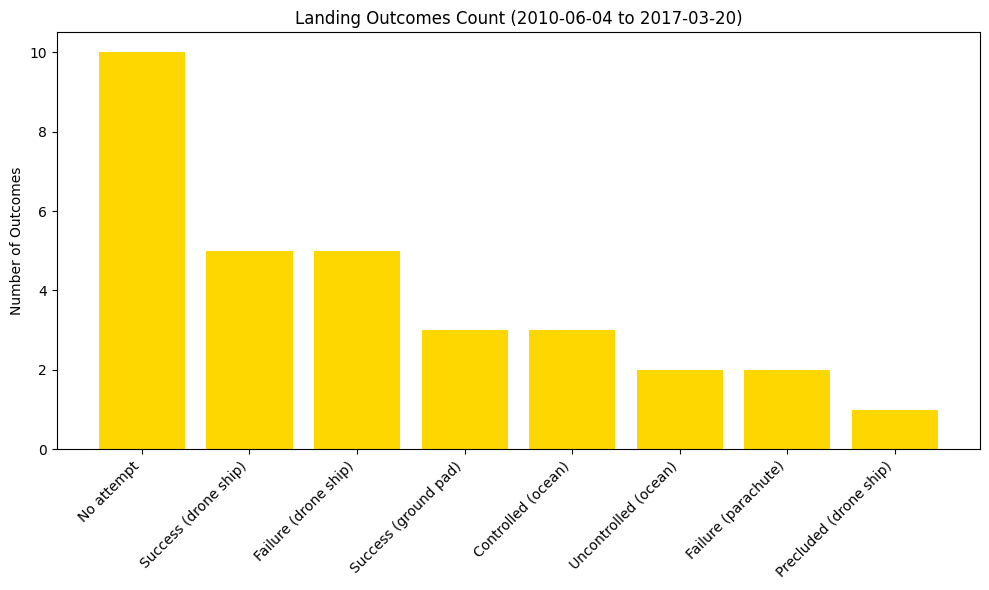

In [39]:
import matplotlib.pyplot as plt

# Step 4: Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_ranked_outcomes['Landing_Outcome'], df_ranked_outcomes['outcome_count'], color='gold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Outcomes')
plt.title('Landing Outcomes Count (2010-06-04 to 2017-03-20)')
plt.tight_layout()
plt.show()

### Reference Links

* <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>  

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*  <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb">Hands-on Lab: Analyzing a real World Data Set</a>




## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


<!--
## Change log
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2024-07-10 | 1.1 |Anita Verma | Changed Version|
| 2021-07-09 | 0.2 |Lakshmi Holla | Changes made in magic sql|
| 2021-05-20 | 0.1 |Lakshmi Holla | Created Initial Version |
-->


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
